In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
revenue = pd.read_pickle('revenue.pk')
fclose = pd.read_pickle('fields_full/adj_close.pk')
fopen = pd.read_pickle('fields_full/adj_open.pk')
matrix = pd.read_pickle('Judge_Matrix.pkl')
csi500 = pd.read_pickle('csi500_index_hist_ret.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'revenue.pk'

In [ ]:
csi500 = csi500[['open','close','low']].set_index(csi500['date'])
public = revenue.reset_index()[['order_book_id','info_date']]
public['order_book_id'] = public['order_book_id'].apply(lambda x: x[0:6])
mclose = csi500['close']
mopen = csi500['open']
mlow = csi500['low']

In [4]:
flow = pd.read_pickle('fields_full/adj_low.pk')

In [5]:
csi500

,open,close,low
date,,,
2014-01-02,3823.3160,3847.8790,3813.8060
2014-01-03,3841.2190,3816.3160,3802.9920
2014-01-06,3806.5850,3710.8980,3709.9090
2014-01-07,3699.9010,3733.6620,3688.4210
2014-01-08,3735.5030,3738.2050,3726.1140
...,...,...,...
2022-07-18,6216.0998,6312.3557,6200.5203
2022-07-19,6318.8373,6335.7093,6283.4024
2022-07-20,6353.0031,6410.7088,6351.8184


In [6]:
fclose = fclose.loc[csi500.index]
fopen = fopen.loc[csi500.index]
flow = flow.loc[csi500.index]
fclose = fclose.replace(0,np.nan)
fopen = fopen.replace(0,np.nan)
flow = flow.replace(0,np.nan)

In [7]:
matrix = matrix.loc[fclose.index,fclose.columns].replace(False,np.nan)
fclose = fclose*matrix
fopen = fopen*matrix
flow = flow*matrix
AOG_every = (fopen / fclose.shift(1)).sub(mopen / mclose.shift(1),axis=0).shift(-1)
JOR_every = (flow / fclose.shift(1)).sub(mlow / mclose.shift(1),axis=0).shift(-1)

In [9]:
H_every = (fclose/fclose.shift(1).rolling(250).max())-1

In [9]:
b.get_group('000001')['info_date'].unique()

array(['2014-03-07T00:00:00.000000000', '2014-04-24T00:00:00.000000000',
       '2014-08-14T00:00:00.000000000', '2014-10-24T00:00:00.000000000',
       '2015-03-13T00:00:00.000000000', '2015-04-24T00:00:00.000000000',
       '2015-08-14T00:00:00.000000000', '2015-10-23T00:00:00.000000000',
       '2016-03-10T00:00:00.000000000', '2016-04-21T00:00:00.000000000',
       '2016-08-12T00:00:00.000000000', '2016-10-21T00:00:00.000000000',
       '2017-03-17T00:00:00.000000000', '2017-04-22T00:00:00.000000000',
       '2017-08-11T00:00:00.000000000', '2017-10-21T00:00:00.000000000',
       '2018-03-15T00:00:00.000000000', '2018-04-20T00:00:00.000000000',
       '2018-08-16T00:00:00.000000000', '2018-10-24T00:00:00.000000000',
       '2019-03-07T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-08-08T00:00:00.000000000', '2019-10-22T00:00:00.000000000',
       '2020-02-14T00:00:00.000000000', '2020-04-21T00:00:00.000000000',
       '2020-08-28T00:00:00.000000000', '2020-10-22

In [11]:
freturn = fclose/fclose.shift(1)-1

In [13]:
AOG_every = AOG_every[public['order_book_id'].unique()]
JOR_every = JOR_every[public['order_book_id'].unique()]

In [11]:
H_every = H_every[public['order_book_id'].unique()]

In [16]:
temp1 = pd.DataFrame(index=AOG_every.index)
temp2 = pd.DataFrame(index=AOG_every.index)

In [17]:
temp3 = pd.DataFrame(index=JOR_every.index)
temp4 = pd.DataFrame(index=JOR_every.index)

In [12]:
temp5 = pd.DataFrame(index=H_every.index)
temp6 = pd.DataFrame(index=H_every.index)

In [15]:
AOG = pd.DataFrame(index=AOG_every.index,columns=public['order_book_id'].unique())
JOR = pd.DataFrame(index=JOR_every.index,columns=public['order_book_id'].unique())

In [13]:
H = pd.DataFrame(index=H_every.index,columns=public['order_book_id'].unique())

In [14]:
a = public.sort_values(by='info_date')
b = a[a['info_date']>pd.to_datetime('2014-01-02')].groupby('order_book_id')

In [46]:
for ticket in public['order_book_id'].unique():
    m = pd.merge_asof(b.get_group(ticket).set_index('info_date'),AOG_every[ticket],left_index=True, right_index=True,direction='forward')
    temp1 = pd.merge_asof(temp2,m,left_index=True, right_index=True).drop('order_book_id',axis=1)
    AOG[ticket] = temp1

In [23]:
for ticket in public['order_book_id'].unique():
    m = pd.merge_asof(b.get_group(ticket).set_index('info_date'),JOR_every[ticket],left_index=True, right_index=True,direction='forward')
    temp4 = pd.merge_asof(temp3,m,left_index=True, right_index=True).drop('order_book_id',axis=1)
    JOR[ticket] = temp4

In [15]:
for ticket in public['order_book_id'].unique():
    m = pd.merge_asof(b.get_group(ticket).set_index('info_date'),H_every[ticket],left_index=True, right_index=True,direction='forward')
    temp5 = pd.merge_asof(temp6,m,left_index=True, right_index=True).drop('order_book_id',axis=1)
    H[ticket] = temp5

In [17]:
H.to_pickle('High250ReportDate.pkl')

In [25]:
JOR.to_pickle('JOR.pkl')

In [47]:
AOG

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,688297,688302,688320,688322,688325,688326,688331,688337,688348,688400
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18,0.001902,0.009961,NaN,NaN,-0.005,NaN,0.00441,0.013424,-0.003733,-0.014542,...,NaN,0.036535,NaN,NaN,NaN,NaN,-0.001701,-0.000951,NaN,NaN
2022-07-19,0.001902,0.009961,NaN,NaN,-0.005,NaN,0.00441,0.013424,-0.003733,-0.014542,...,NaN,0.036535,NaN,NaN,NaN,NaN,-0.001701,-0.000951,NaN,NaN
2022-07-20,0.001902,0.009961,NaN,NaN,-0.005,NaN,0.00441,0.013424,-0.003733,-0.014542,...,NaN,0.036535,NaN,NaN,NaN,NaN,-0.001701,-0.000951,NaN,NaN


In [20]:
m = pd.merge_asof(b.get_group('000004').set_index('info_date'),AOG_every['000004'],left_index=True, right_index=True,direction='forward')

In [10]:
n = pd.merge_asof(AOG,m,left_index=True, right_index=True).drop('order_book_id',axis=1)

In [21]:
k = pd.merge_asof(k,m,left_index=True, right_index=True).drop('order_book_id',axis=1)

In [22]:
AOG_every['000001'].loc['2017-03-17':'2017-04-27']

date
2017-03-17   -0.002348
2017-03-20    0.000549
2017-03-21    0.000221
2017-03-22   -0.000359
2017-03-23    0.000454
2017-03-24   -0.007438
2017-03-27    0.003262
2017-03-28    0.000242
2017-03-29    0.003178
2017-03-30    0.000185
2017-03-31   -0.008783
2017-04-05   -0.003346
2017-04-06   -0.000264
2017-04-07    0.000496
2017-04-10   -0.001134
2017-04-11    0.001589
2017-04-12    0.000004
2017-04-13   -0.002268
2017-04-14    0.004169
2017-04-17   -0.000529
2017-04-18    0.002134
2017-04-19   -0.000927
2017-04-20    0.000315
2017-04-21    0.002917
2017-04-24    -0.00016
2017-04-25    0.000092
2017-04-26    0.000832
2017-04-27    0.001818
Name: 000001, dtype: object

In [33]:
m = pd.merge_asof(new,AOG_every,left_index=True, right_index=True,direction='forward')

In [20]:
n = pd.merge_asof(AOG,m,left_index=True, right_index=True)

In [37]:
m[m.columns[4835:]].loc['2017-01-03':'2017-01-11']

,000001_y,000002_y,000004_y,000005_y,000006_y,000007_y,000008_y,000009_y,000010_y,000011_y,...,688297_y,688302_y,688320_y,688322_y,688325_y,688326_y,688331_y,688337_y,688348_y,688400_y
2017-01-03,-0.001247,0.000327,-0.000606,-0.000156,0.000878,-0.000539,0.000915,-0.001112,-0.009142,0.00036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.001574,0.000483,-0.003544,-0.003797,-0.00462,0.012194,0.002612,0.000483,-0.00718,-0.011234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,0.000066,0.000544,-0.001959,-0.001369,-0.001971,0.000066,0.001128,-0.000883,-0.001215,0.000066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,0.000977,-0.00096,-0.011761,-0.00898,-0.010012,-0.010417,0.000977,-0.004731,0.003572,-0.015319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,0.000414,0.000898,0.004134,0.000414,-0.002601,0.000414,0.001463,-0.004316,-0.004727,-0.008913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,0.000819,-0.001004,-0.003869,0.001912,0.01933,0.000298,0.001912,0.000028,-0.004573,-0.009417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-11,-0.000093,NaN,-0.007244,-0.00483,-0.008296,-0.005035,0.001001,0.000032,0.001001,-0.00385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
n.to_pickle('AOG.pkl')

In [9]:
fclose = fclose[public['order_book_id'].unique()]
fopen = fopen[public['order_book_id'].unique()]

In [14]:
AOG = pd.DataFrame(index=fclose.index,columns =fclose.columns)

In [16]:
AOG_every

ticker,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,688297,688302,688320,688322,688325,688326,688331,688337,688348,688400
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18,-0.004761,0.001208,NaN,NaN,0.006032,0.001502,0.007136,0.006077,-0.001027,-0.001027,...,-0.007862,-0.003277,-0.005292,NaN,-0.001027,0.005828,-0.001407,0.006876,-0.001027,NaN
2022-07-19,-0.001984,0.001765,NaN,NaN,-0.00273,-0.001469,-0.00273,0.003665,-0.00273,-0.001791,...,-0.009014,-0.00273,-0.00273,NaN,-0.000846,-0.013779,-0.012279,-0.005398,0.00728,NaN
2022-07-20,-0.003568,-0.004534,NaN,NaN,0.00166,0.00166,0.00166,-0.021192,0.00166,0.00166,...,0.00166,-0.008229,0.00166,NaN,-0.021777,-0.000912,0.006368,0.006572,0.005621,NaN


In [41]:
AOG_every.index.searchsorted(pd.to_datetime('2014-01-05'))

2

In [38]:
pre = None

for ticket in AOG_every.columns:
    i = 0
    #公告日期
    date1 = b.get_group(ticket)['info_date'].iloc[i]
    #对每天
    for j in range(len(AOG_every.index)):
        date2 = AOG_every.index[j]
        #找到公告日期后第一天有因子值的日期
        if date2<date1:
            pass
        else:
            #遍历完成
            if i>=len(b.get_group(ticket)['info_date'])-1:
                break
            #往后一个公告日
            i+=1
            date1 = b.get_group(ticket)['info_date'].iloc[i]
            if pre == None:
                pre = date2
                pass
            else:
                AOG.loc[pre:date2,ticket]=AOG_every.loc[pre,ticket]
                pre = date2
    AOG.loc[pre:,ticket]=AOG_every.loc[pre,ticket]

In [70]:
#matrix = matrix.loc[AOG.index,AOG.columns].replace(False,np.nan)
AOG = (AOG*matrix).loc[pd.to_datetime('2017-01-03'):]

In [48]:
AOG.to_pickle('AOG.pkl')

In [57]:
freturn = pd.read_pickle('freturn.pkl').loc[AOG.index,AOG.columns]
overnight = ((fopen /fclose.shift(1)-1)*matrix).loc[AOG.index,AOG.columns]
inday = ((fopen/fclose.shift(1)-1)*matrix).loc[AOG.index,AOG.columns]

In [62]:
def rankic(factor,re):
    return factor.rank(axis=1).shift(2).corrwith(re.rank(axis=1),method='spearman',axis=1)

def divide(factor):
    groups = [0 for i in range(10)]
    g = pd.cut(factor.stack(dropna=False),[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],labels=False,duplicates='drop').unstack()
    for i in range(10):
        groups[i]=(g==i)
    
    return groups

def group_return(num,groups,overnight,inday,dbm):
    #overnight: open(t+1)-closet  2017-01-04 -- 2023-04-07
    
    greturn = [0 for i in range(num)]
    
    for i in range(num):
        greturn[i] = ((groups[i].shift(2)*overnight).sum(axis=1)/ groups[i].shift(2).sum(axis=1) + (groups[i].shift(1)*inday).sum(axis=1)/ groups[i].shift(1).sum(axis=1)).sub(dbm,axis=0)
    return greturn

def eweight(groups):
    weight = [0 for i in range(len(groups))]
    for i in range(len(groups)):
        weight[i]=groups[i].iloc[1:].apply(lambda x: x/x.sum(),axis=1)
    return weight

def turnover_rate_mean(weight):
    trm = [0 for i in range(len(weight))]
    for i in range(len(weight)):
        trm[i] = weight[i].diff().abs().sum(axis=1)[1:].mean()
    
    return trm

In [43]:
rankIC = rankic(AOG,freturn)

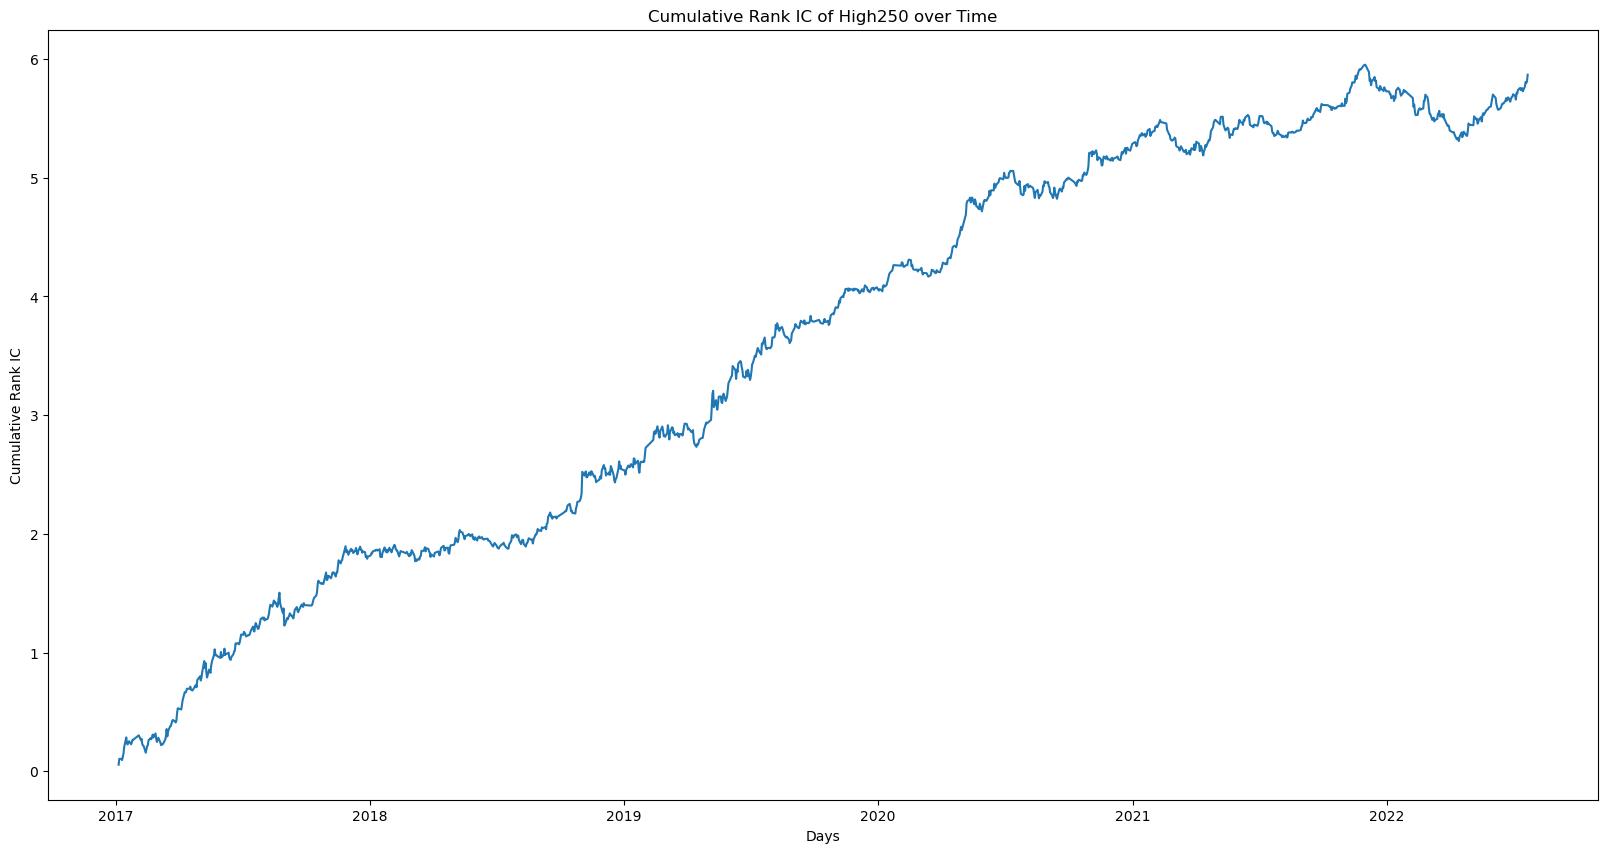

In [44]:
cumulative_rank_ic = pd.Series(rankIC).cumsum()
fig = plt.figure(figsize=(20,10))
plt.plot(cumulative_rank_ic)
plt.xlabel('Days')
plt.ylabel('Cumulative Rank IC')
plt.title('Cumulative Rank IC of High250 over Time')
plt.show()

In [45]:
mean_250 = pd.Series(rankIC).mean()
std_250 = pd.Series(rankIC).std()
icir_250 = mean_250 / std_250
print("IC Mean:",mean_250)
print("ICIR:",icir_250)

IC Mean: 0.00435333625092457
ICIR: 0.14461431869774846


In [46]:
groups = divide(AOG.rank(pct=True,axis=1))

In [59]:
dbm = (csi500['close']/csi500['close'].shift(1)-1).loc[AOG.index]

In [63]:
greturn = group_return(10,groups,overnight,inday,dbm)

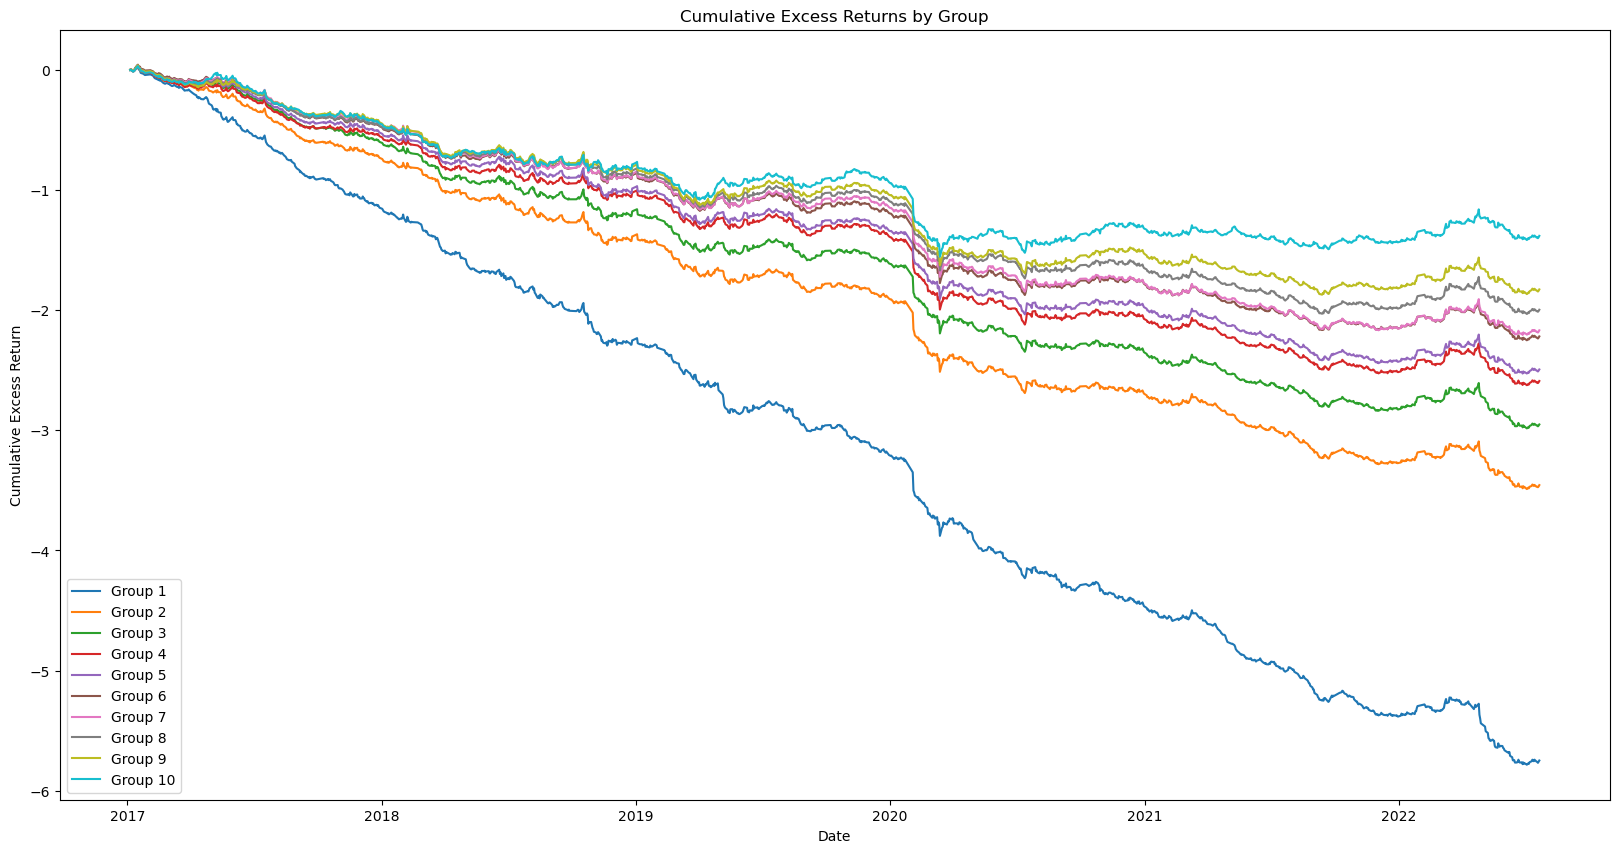

In [64]:
fig = plt.figure(figsize=(20,10))
for i in range(10):
    cumul = greturn[i].cumsum()
    plt.plot(cumul, label=f'Group {i+1}')


plt.title('Cumulative Excess Returns by Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Return')
plt.legend()
plt.show()